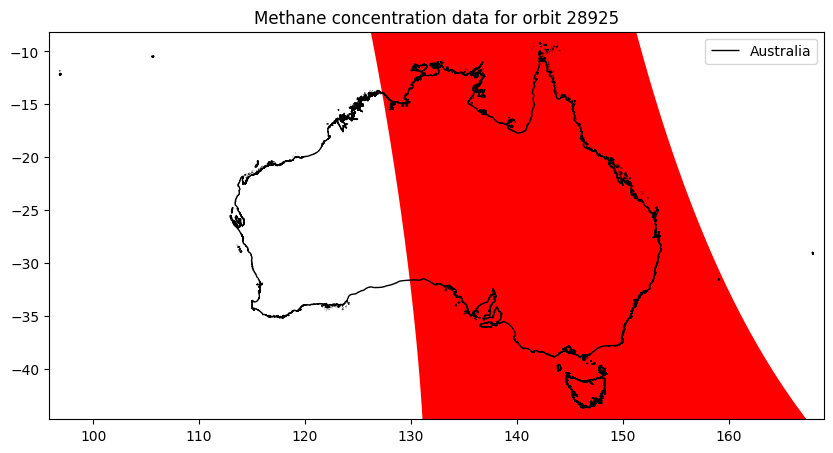

In [3]:
from sentinelsat import SentinelAPI
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt

# Download the shapefile of Australia or use a GeoJSON file
australia = gpd.read_file("/Users/angfu/jupyterNoteBook/AUS_2021_AUST_SHP_GDA2020/AUS_2021_AUST_GDA2020.shp")

api = SentinelAPI("s5pguest", "s5pguest", "https://s5phub.copernicus.eu/dhus", show_progressbars=True, timeout=60)

# Search product ID using OpenSearch
data_date = (date(2020, 5, 7), date(2023, 5, 20))
product_type = "L2__CH4___"
kw = {
    "orbitnumber": 28627
}

# Query data
result = api.query(date=data_date, producttype=product_type, **kw)
product_ids = list(result.keys())

result_df = api.to_dataframe(result)
result_geojson = api.to_geojson(result)
result_gdf = api.to_geodataframe(result)

# Set the plot extent to focus on Australia
minx, miny, maxx, maxy = australia.total_bounds
padding = 1  # Set padding to control the space around the boundaries
ax_extent = [minx - padding, maxx + padding, miny - padding, maxy + padding]

# Plot the data on a map of Australia
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(ax_extent[0], ax_extent[1])
ax.set_ylim(ax_extent[2], ax_extent[3])
australia.boundary.plot(ax=ax, linewidth=1, color='black')
result_gdf.plot(ax=ax, color='red', markersize=10)

plt.title("Methane concentration data for orbit 28925")
plt.legend(["Australia", "Methane Concentration"])
plt.show()
